<a href="https://colab.research.google.com/github/vinigm/Portfolio/blob/main/1_Supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supermarket Store Branch Sales Analysis**
---



## **Importação das bibliotecas necessárias**

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Importação dos dados**

Utilizaremos um dataset no qual teremos informações sobre uma rede de supermercados. O dataset foi obtido no Kaggle e pode ser acessado através desse [LINK](https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data).

A motivação principal será como aumentamos as vendas de maneira geral dessa rede.

In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/vinigm/Portfolio/main/Datasets/1_Supermarkets.csv')

## **Analise exploratória dos dados**

In [93]:
data = pd.DataFrame(df)

In [94]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [95]:
data.shape

(896, 5)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


- Interessante pontuar que não existem valores nulos para nenhuma das colunas

In [97]:
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


##**Data Wrangling**

Um dos mais importantes indicadores no varejo é o "TICKET MÉDIO", vou criar uma coluna e adicionar no DF.

In [98]:
# Removendo possiveis espaços no cabeçalho da tabela
data.columns = data.columns.str.replace(' ','_')   

# Renomeando as colunas
data.rename(columns={"Store_ID_": "store_id",
                     "Store_Area": "store_area",
                     "Items_Available": "items",
                     "Daily_Customer_Count": "daily_customers",
                     "Store_Sales": "sales"
                     }, inplace=True)

# Adicionando uma coluna com o ticket médio
ticketmedio = data["sales"]/data['daily_customers']
data['ticketmedio'] = ticketmedio

In [99]:
data.head()

,store_id,store_area,items,daily_customers,sales,ticketmedio
0,1,1659,1961,530,66490,125.452830
1,2,1461,1752,210,39820,189.619048
2,3,1340,1609,720,54010,75.013889
3,4,1451,1748,620,53730,86.661290
4,5,1770,2111,450,46620,103.600000


### Analisando as vendas e ticket médio em relação às areas das lojas

Através de um gráfico simples de ***Area x Venda*** é possível verificar que as lojas entre **1100** e **1900** de área tem uma **maior concentração de vendas**.

Text(0, 0.5, 'Vendas')

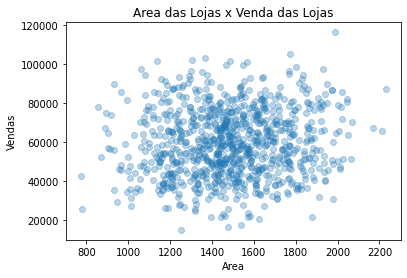

In [101]:
plt.scatter(data['store_area'], data['sales'], alpha=0.3)
plt.title('Area das Lojas x Venda das Lojas')
plt.xlabel('Area')
plt.ylabel('Vendas')

A idéia é consolidar essa hipotése através do gráfico **Area x Ticket Medio**

Text(0, 0.5, 'Ticket Médio')

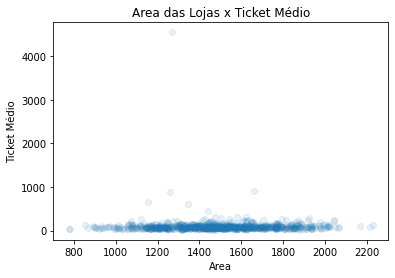

In [102]:
plt.scatter(data['store_area'], data['ticketmedio'], alpha=0.1)
plt.title('Area das Lojas x Ticket Médio')
plt.xlabel('Area')
plt.ylabel('Ticket Médio')

(0.0, 400.0)

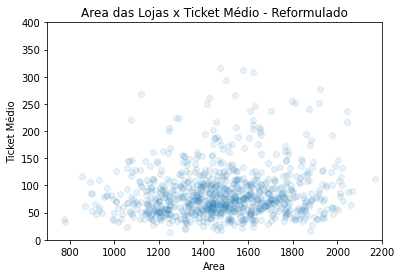

In [103]:
# Setando os intervalos de X e Y para focar no intervalo de maior concentração

plt.scatter(data['store_area'], data['ticketmedio'], alpha=0.1)
plt.title('Area das Lojas x Ticket Médio - Reformulado')
plt.xlabel('Area')
plt.ylabel('Ticket Médio')
plt.xlim(700, 2200)
plt.ylim(0, 400)

Dessa maneira, é visível que as áreas entre **1100 e 1800** tem o indicador melhor que areas diferentes dessas.

Através desse gráfico podemos notar uma concentração menor, porém significativa no intervalo de [150, 300] de ticket médio. Uma maneira que podemos descobrir quais são essas lojas é fazer uma classificação de tamanhos de lojas em 3 níveis: pequenas, médias e grandes e tentar descobrir aonde essas lojas estão inseridas nesse gráfico de ticket médio

### Analisando melhor as áreas das lojas

In [118]:
data['type'] = np.where(df['store_area'] < 1100, 'small', np.where(df['store_area'] > 1800, 'big', 'medium')) 

In [121]:
data.head()

,store_id,store_area,items,daily_customers,sales,ticketmedio,type
0,1,1659,1961,530,66490,125.452830,medium
1,2,1461,1752,210,39820,189.619048,medium
2,3,1340,1609,720,54010,75.013889,medium
3,4,1451,1748,620,53730,86.661290,medium
4,5,1770,2111,450,46620,103.600000,medium


(0.0, 400.0)

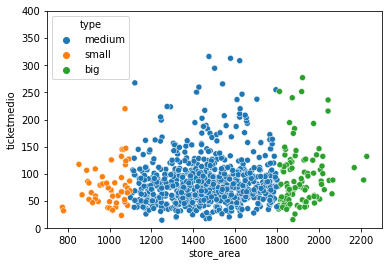

In [126]:
sns.scatterplot(x=data['store_area'],
                y=data['ticketmedio'],
                hue=data['type'],).set_ylim(0,400)

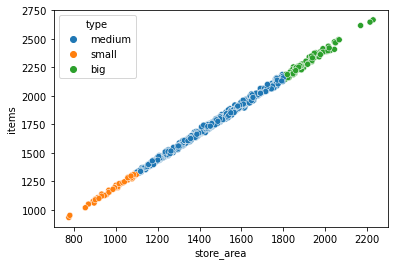

In [146]:
sns.scatterplot(x=data['store_area'],
                y=data['items'],
                hue=data["type"])

(0.0, 400.0)

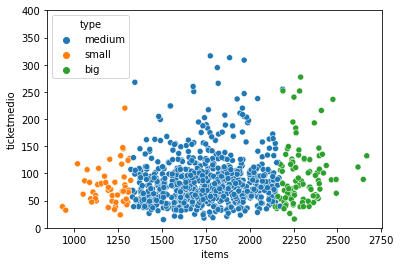

In [149]:
sns.scatterplot(x=data['items'],
                y=data['ticketmedio'],
                hue=data["type"]).set_ylim(0,400)

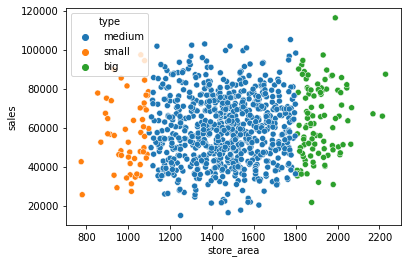

In [151]:
sns.scatterplot(x=data['store_area'],
                y=data['sales'],
                hue=data["type"])